In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 


def numpy_distance(x,y):
    return np.linalg.norm(x-y) ### Calculates Euclidean distance between two points

In [2]:
data = pd.read_csv("KNN 2.csv")  ### loading of data set

In [3]:
X = data.to_numpy()    ## making X as the features or the input parameters                      
X = X[:,1:47]

Y = data.to_numpy()  ## Making Y to contain the output(label) of the data points or features
Y = Y[:,47]

## Splitting the data such that 80% of the data used for training the model and
## 20% data is used to test the modes
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2) 


## Empty list which will hold the accuracy values of corresponding K value
accuracy = []
K = np.arange(1,34)  ## K is a list [1,2,.....34]

for k in K:   ## For each value of k we test the model
    prediction = []   ## Prediction of each test case will be stored in this list
    coorect_count = 0  ## how many correct predictions were made
    for i in range(len(X_test)):  ## for each point in testing data we do prediction
        distances = []
        for j in range(len(X_train)):
            dist = numpy_distance(X_test[i], X_train[j])
            ## we are adding the training point, the distance between this training point and
            ## the test point and the label assosciated with the training point
            distances.append((X_train[j], dist, y_train[j]))  
        ## We are sorting this distance list on the basis of distance between the trainin
        ## point and the test point 
        ## key=lambda x: x[1]  here x:x[1] signifies that we will sort this list using 
        ## 2nd(in python indexing starts from 0) column i.e. distance
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k] ## Considering k closest points
        class_counter = Counter()  ## a counter to check which labels appeared how many times
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0])## whichever appers most we predict that label 
        if(y_test[i] == prediction[i]):  ## if prediction is correct than increase correct count
            coorect_count = coorect_count + 1
    acc = coorect_count/float(len(X_test))  ## accuracy
    accuracy.append(acc)
accuracy

[0.6216216216216216,
 0.6216216216216216,
 0.5675675675675675,
 0.5945945945945946,
 0.4864864864864865,
 0.6216216216216216,
 0.5945945945945946,
 0.5675675675675675,
 0.5135135135135135,
 0.5135135135135135,
 0.5675675675675675,
 0.5405405405405406,
 0.5135135135135135,
 0.5675675675675675,
 0.5405405405405406,
 0.5675675675675675,
 0.5675675675675675,
 0.5405405405405406,
 0.5945945945945946,
 0.5945945945945946,
 0.5405405405405406,
 0.5945945945945946,
 0.5135135135135135,
 0.5675675675675675,
 0.5405405405405406,
 0.5675675675675675,
 0.5675675675675675,
 0.5945945945945946,
 0.5945945945945946,
 0.6216216216216216,
 0.5675675675675675,
 0.5675675675675675,
 0.5675675675675675,
 0.6216216216216216,
 0.6216216216216216,
 0.5675675675675675,
 0.5945945945945946,
 0.4864864864864865,
 0.6216216216216216,
 0.5945945945945946,
 0.5675675675675675,
 0.5135135135135135,
 0.5135135135135135,
 0.5675675675675675,
 0.5405405405405406,
 0.5135135135135135,
 0.5675675675675675,
 0.5405405405

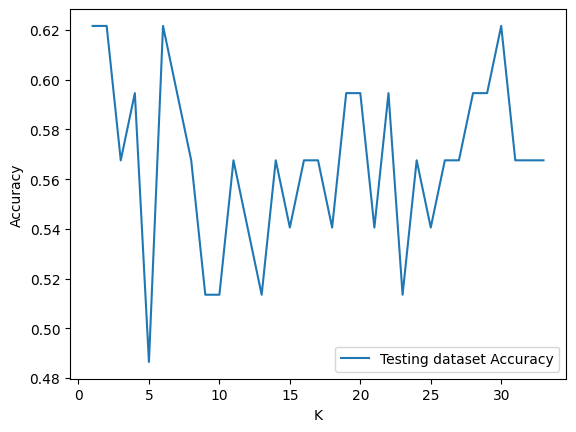

In [4]:
## plot of accuracy and value of K
plt.plot(K, accuracy, label = 'Testing dataset Accuracy')
plt.legend() 
plt.xlabel('K') 
plt.ylabel('Accuracy') 
plt.show()

In [5]:
def adjusted_cv(score):
    return score

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

K = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(K, X, Y, cv=10)
cv_scores= adjusted_cv(cv_scores)
print(cv_scores)
print('cv_scores mean:{}' .format(np.mean(cv_scores)))




[0.36842105 0.57894737 0.38888889 0.55555556 0.44444444 0.38888889
 0.5        0.55555556 0.44444444 0.61111111]
cv_scores mean:0.4836257309941521
